In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%precision 3
%matplotlib inline

In [13]:
sns.set()
sns.set_style('darkgrid',{"axes.facecolor": ".9"})
sns.set_context('notebook')

In [14]:
df = pd.read_csv('data/data.csv')
df[:3]

,name,play,like,creator,size,date
0,BEYOND THE FIRE WALL - たぶん全く新しい陣取りゲーム -,144,11,mag/maguro,4MB,2020/10/18（日） 22:41
1,Go to Run,236,13,ふらふらっと,1MB,2020/10/18（日） 22:24
2,Don't Fall,"2,262",24,nysyo,0MB,2020/10/18（日） 21:59


In [15]:
df['like'] = df['like'].astype(int)
df['play'] = df['play'].str.replace(',', "")
df['play'] = df['play'].astype(int)
df['size'] = df['size'].str[:-2]
df['size'] = df['size'].astype(int)
df['date'] = df['date'].str.split('（', expand=True)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

In [16]:
df.describe()

,play,like,size
count,443.000000,443.000000,443.000000
mean,430.810384,11.069977,30.688488
std,1244.129731,21.317405,62.940987
min,5.000000,0.000000,0.000000
25%,38.500000,2.000000,2.000000
50%,98.000000,4.000000,15.000000
75%,282.500000,9.500000,38.500000
max,14000.000000,275.000000,971.000000


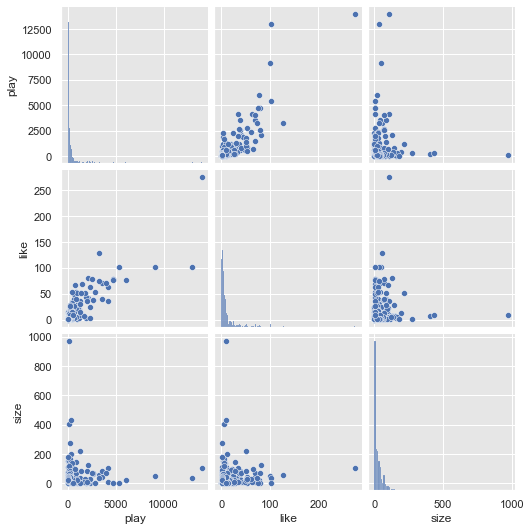

In [17]:
sns.pairplot(df)

(array([156.,  71.,  44.,  26.,  21.,  21.,  16.,  15.,   4.,   7.]),
 array([  5. ,  54.5, 104. , 153.5, 203. , 252.5, 302. , 351.5, 401. ,
        450.5, 500. ]),
 <a list of 10 Patch objects>)

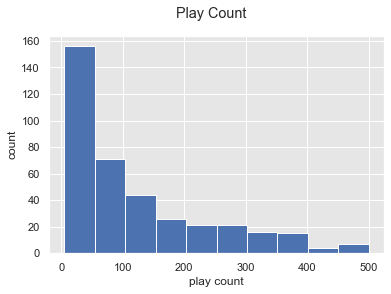

In [18]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Play Count')
ax = fig.add_subplot(111, xlabel='play count', ylabel='count')
ax.hist(df['play'], range=(df['play'].min(), 500))

(array([185., 112.,  53.,  19.,  14.,   8.,   9.,   5.,   4.,   7.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

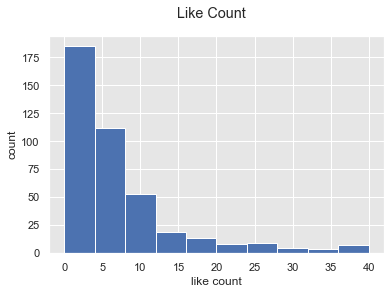

In [19]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Like Count')
ax = fig.add_subplot(111, xlabel='like count', ylabel='count')
ax.hist(df['like'], range=(df['like'].min(), 40))

{'whiskers': [<matplotlib.lines.Line2D at 0x12c79a128>,
 'caps': [<matplotlib.lines.Line2D at 0x12c79a898>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bf56588>],
 'medians': [<matplotlib.lines.Line2D at 0x12c941048>],
 'fliers': [],
 'means': []}

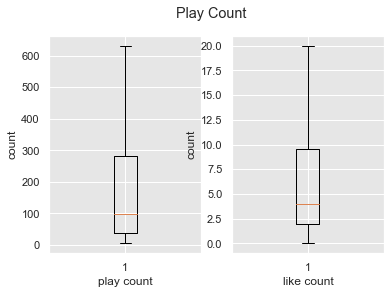

In [22]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Play Count')
ax1 = fig.add_subplot(1, 2, 1, xlabel='play count', ylabel='count')
ax2 = fig.add_subplot(1, 2, 2, xlabel='like count', ylabel='count')
ax1.boxplot(df['play'], sym="")
ax2.boxplot(df['like'], sym="")